In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
import joblib

## Load Data

In [5]:
root_dir = './'
local_path_biome = '/bd_mir_bioma_without_xy.csv'
file_path_biome = root_dir + local_path_biome

df_biome = pd.read_csv(file_path_biome)

In [6]:
df_biome.shape[0]

720

In [7]:
df_biome_atlantic = df_biome.where(df_biome['Bioma'] == 'Atlantic Forest').dropna(axis = 0)
df_biome_atlantic_data = df_biome_atlantic.drop(['ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_atlantic_target = pd.DataFrame(df_biome_atlantic, columns=['Carbon_gkg'])

In [8]:
df_biome_test = pd.read_csv('./bd_mir_biome_test_without_xy.csv')

In [9]:
df_biome_test_atlantic = df_biome_test.where(df_biome_test['Bioma'] == 'Atlantic Forest').dropna(axis = 0)
df_biome_test_atlantic_data = df_biome_test_atlantic.drop(['ID','ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_test_atlantic_data = df_biome_test_atlantic_data.apply(lambda x:np.log(1/x))
df_biome_test_atlantic_target = pd.DataFrame(df_biome_test_atlantic, columns=['Carbon_gkg'])

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

X = pipeline.fit_transform(df_biome_test_atlantic_data)
df_biome_test_atlantic_data_tr = pd.DataFrame(X,columns=df_biome_test_atlantic_data.columns)

## Preprocess

In [11]:
df_biome_atlantic

,ID_Unico,Bioma,Carbon_gkg,4000,3995,3990,3985,3980,3975,3970,...,645,640,635,630,625,620,615,610,605,600
180,36539.0,Atlantic Forest,6.960557,0.079603,0.079200,0.079060,0.079230,0.079430,0.078560,0.078410,...,0.003110,0.003920,0.003340,0.003650,0.003440,0.003090,0.002090,0.003650,0.002490,0.003390
181,47408.0,Atlantic Forest,4.350348,0.063731,0.063560,0.063486,0.063450,0.063506,0.062730,0.062433,...,0.001005,0.001770,0.001632,0.001590,0.001284,0.001870,0.002810,0.001727,0.000710,0.001662
182,36457.0,Atlantic Forest,5.800464,0.085746,0.084090,0.083630,0.083200,0.083430,0.082730,0.083130,...,0.005640,0.005940,0.005420,0.005770,0.005950,0.005710,0.005940,0.005350,0.004590,0.004670
183,33259.0,Atlantic Forest,10.556840,0.125310,0.125758,0.125644,0.124860,0.125336,0.125336,0.124988,...,0.018435,0.017726,0.017926,0.017798,0.016570,0.015408,0.015744,0.013604,0.011792,0.012093
184,38371.0,Atlantic Forest,7.540603,0.076020,0.075048,0.074908,0.075035,0.074526,0.074568,0.074036,...,0.004407,0.004706,0.004580,0.004734,0.004710,0.004114,0.004404,0.004444,0.003946,0.004293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,34060.0,Atlantic Forest,16.400000,0.076884,0.075970,0.075560,0.075160,0.074630,0.074520,0.074560,...,0.005130,0.004820,0.006180,0.005870,0.004700,0.005000,0.005680,0.005850,0.003890,0.005720
356,36446.0,Atlantic Forest,5.800464,0.069119,0.067000,0.066090,0.066290,0.066600,0.065560,0.065520,...,0.003300,0.003450,0.004060,0.003760,0.002880,0.002770,0.003290,0.004420,0.003160,0.003710
357,33095.0,Atlantic Forest,1.908353,0.118485,0.119032,0.118496,0.117520,0.117560,0.118630,0.117618,...,0.013713,0.013724,0.012652,0.011844,0.011736,0.011996,0.010498,0.009396,0.010112,0.009477
358,38464.0,Atlantic Forest,6.148492,0.088015,0.087812,0.087360,0.087097,0.087120,0.086744,0.086908,...,0.007895,0.007376,0.007634,0.007622,0.007510,0.007100,0.007208,0.006730,0.007938,0.006023


In [12]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

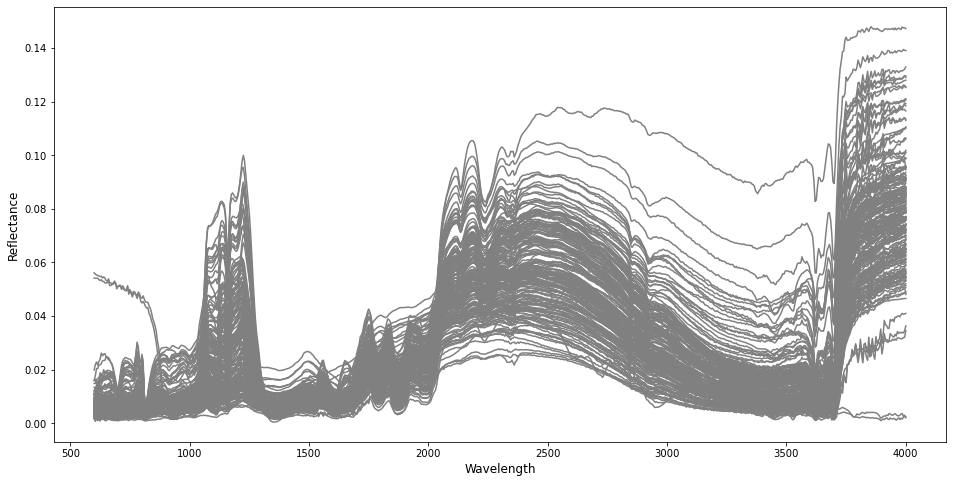

In [13]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
index_col.sort(reverse=True)
plt.figure(figsize = (16, 8))
for i in range(len(df_biome_atlantic_data)):
    
    test_row = df_biome_atlantic_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [14]:
index_ex = df_biome_atlantic_data['600'].idxmax()
df_biome_atlantic_data = df_biome_atlantic_data.drop(index=index_ex)
df_biome_atlantic_target = df_biome_atlantic_target.drop(index=index_ex)

In [15]:
index_ex = df_biome_atlantic_data['600'].idxmax()
df_biome_atlantic_data = df_biome_atlantic_data.drop(index=index_ex)
df_biome_atlantic_target = df_biome_atlantic_target.drop(index=index_ex)

In [16]:
#Converting data from reflectance values to absorbance values
from math import log, exp

df_biome_atlantic_data = df_biome_atlantic_data.apply(lambda x:np.log(1/x))

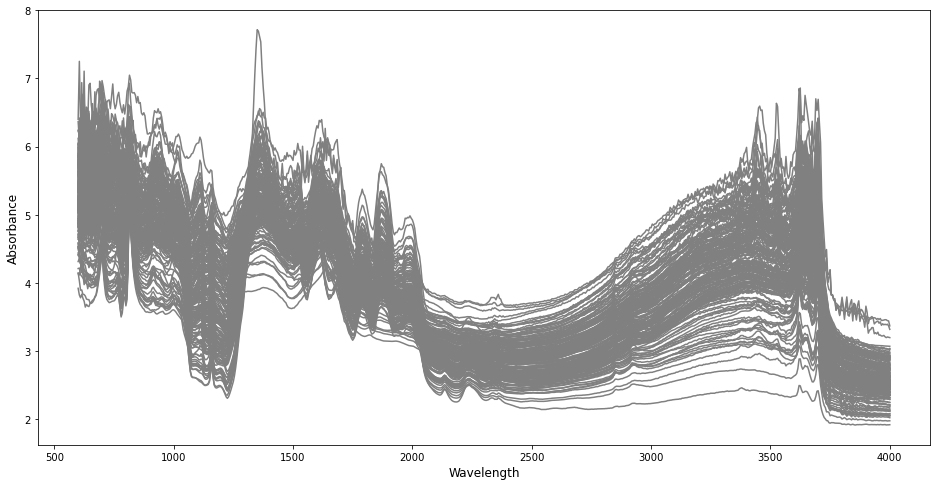

In [17]:
plt.figure(figsize = (16, 8))
for i in range(len(df_biome_atlantic_data)):
    
    test_row = df_biome_atlantic_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)
plt.show()

In [18]:
#Savitzky-Golay Filtering
import scipy
from scipy import signal

v = scipy.signal.savgol_filter(df_biome_atlantic_data,21,3)
for i in range(len(df_biome_atlantic_data)):
    for j in range(len(df_biome_atlantic_data.iloc[i])):
        df_biome_atlantic_data.iloc[i][j] = v[i][j]

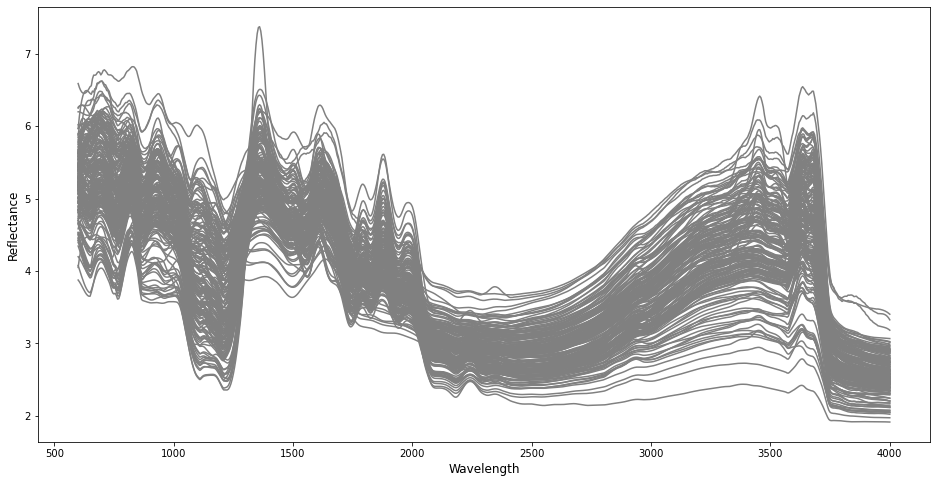

In [19]:
plt.figure(figsize = (16, 8))
for i in range(len(df_biome_atlantic_data)):
    
    test_row = df_biome_atlantic_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [20]:
# Standardizing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

X = pipeline.fit_transform(df_biome_atlantic_data)
df_biome_atlantic_data_tr = pd.DataFrame(X,columns=df_biome_atlantic_data.columns)
df_biome_atlantic_data_tr

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,-0.089012,-0.095909,-0.100062,-0.101848,-0.101627,-0.099746,-0.096542,-0.092346,-0.087486,-0.082287,...,0.733227,0.787561,0.849802,0.919193,0.995029,1.076403,1.161703,1.247622,1.327365,1.387989
1,0.779757,0.770365,0.763815,0.759913,0.758462,0.759265,0.762127,0.766854,0.773249,0.781117,...,2.221516,2.193142,2.182809,2.196466,2.241040,2.324589,2.456155,2.644718,2.896027,3.205281
2,-0.353282,-0.340123,-0.329402,-0.320853,-0.314216,-0.309238,-0.305674,-0.303284,-0.301833,-0.301088,...,-0.148355,-0.160737,-0.161715,-0.149872,-0.123220,-0.079017,-0.013585,0.077712,0.199924,0.356480
3,-1.884734,-1.886147,-1.887007,-1.887462,-1.887614,-1.887536,-1.887276,-1.886874,-1.886359,-1.885760,...,-2.089787,-2.081685,-2.071945,-2.059897,-2.044414,-2.023503,-1.993614,-1.948523,-1.877762,-1.765236
4,0.103073,0.104851,0.107623,0.111253,0.115607,0.120553,0.125957,0.131686,0.137607,0.143583,...,0.212272,0.250390,0.290744,0.332833,0.376134,0.419971,0.463271,0.504100,0.538890,0.561363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.056511,0.069571,0.080519,0.089603,0.097056,0.103098,0.107937,0.111776,0.114810,0.117231,...,0.068311,0.060048,0.053076,0.048524,0.047691,0.052138,0.063785,0.084973,0.118348,0.166210
174,0.517860,0.538278,0.554777,0.567837,0.577898,0.585374,0.590657,0.594122,0.596137,0.597060,...,0.683283,0.728347,0.776144,0.824478,0.870864,0.912182,0.944105,0.960220,0.950839,0.902051
175,-1.661629,-1.661171,-1.660501,-1.659762,-1.659060,-1.658475,-1.658066,-1.657885,-1.657976,-1.658383,...,-1.549576,-1.525214,-1.499333,-1.472136,-1.443558,-1.413057,-1.379210,-1.339070,-1.287207,-1.214748
176,-0.491940,-0.487340,-0.483822,-0.481253,-0.479496,-0.478414,-0.477866,-0.477715,-0.477820,-0.478045,...,-0.576491,-0.594165,-0.607074,-0.614302,-0.614574,-0.606048,-0.586001,-0.550430,-0.493687,-0.408725


## Model

In [21]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [38]:
forest_reg_atlantic_setup = RandomForestRegressor()
param_grid = {'n_estimators': [10,50,100,200]}
gsearch = GridSearchCV(forest_reg_atlantic_setup, param_grid)
forest_reg_atlantic = gsearch.fit(df_biome_atlantic_data_tr, df_biome_atlantic_target)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

In [39]:
Y_predict_atlantic_forest = forest_reg_atlantic.predict(df_biome_test_atlantic_data_tr)
m = mean_squared_error(df_biome_test_atlantic_target, Y_predict_atlantic_forest)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_atlantic_target, Y_predict_atlantic_forest)))

root_mean_squared_error: 4.124995244134748
R2: 0.3099576448195541


In [40]:
joblib.dump(forest_reg_atlantic, './model/atlantic/forest_reg_atlantic.pkl')

['./model/atlantic/forest_reg_atlantic.pkl']

D:\softwareForLearn\anaconda\inss\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:>

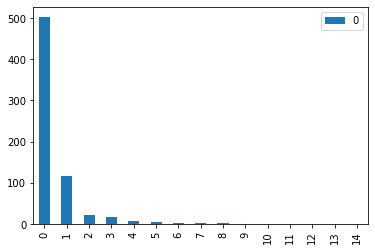

In [48]:
#PCA
df_biome_atlantic_data_tr_ = df_biome_atlantic_data_tr
ew_atlantic, ev_atlantic = np.linalg.eig(np.cov(df_biome_atlantic_data_tr_.T))
ew_atlantic_order = np.argsort(ew_atlantic)[::-1]
ew_atlantic_sort = ew_atlantic[ew_atlantic_order]
ev_atlantic_sort = ev_atlantic[:,ew_atlantic_order]
pd.DataFrame(ew_atlantic_sort[0:15]).plot(kind='bar')

In [22]:
from sklearn.decomposition import PCA
from sklearn import linear_model

In [36]:
pca_atlantic = PCA(n_components=10)
pca_atlantic.fit(df_biome_atlantic_data_tr)
df_biome_atlantic_data_tr_pca = pca_atlantic.transform(df_biome_atlantic_data_tr)

ols_atlantic = linear_model.LinearRegression()
ols_atlantic.fit(df_biome_atlantic_data_tr_pca, df_biome_atlantic_target)

LinearRegression()

In [37]:
df_biome_test_atlantic_data_tr_pca = pca_atlantic.transform(df_biome_test_atlantic_data_tr)
Y_predict_atlantic_pca = ols_atlantic.predict(df_biome_test_atlantic_data_tr_pca)
m = mean_squared_error(df_biome_test_atlantic_target, Y_predict_atlantic_pca)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_atlantic_target, Y_predict_atlantic_pca)))

root_mean_squared_error: 3.7716422286398474
R2: 0.42311423361041645


In [41]:
joblib.dump(pca_atlantic, './model/atlantic/pca_atlantic.pkl')

['./model/atlantic/pca_atlantic.pkl']

In [42]:
joblib.dump(ols_atlantic, './model/atlantic/ols_atlantic.pkl')

['./model/atlantic/ols_atlantic.pkl']

In [23]:
#PLSR
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

In [62]:
pls_model_atlantic_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1,5)}
gsearch = GridSearchCV(pls_model_atlantic_setup, param_grid)
pls_model_atlantic = gsearch.fit(df_biome_atlantic_data_tr, df_biome_atlantic_target)

In [63]:
Y_predict_atlantic_pls = pls_model_atlantic.predict(df_biome_test_atlantic_data_tr)
m = mean_squared_error(df_biome_test_atlantic_target, Y_predict_atlantic_pls)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_atlantic_target, Y_predict_atlantic_pls)))

root_mean_squared_error: 3.823415778972519
R2: 0.40716764145410267


In [64]:
joblib.dump(pls_model_atlantic, './model/atlantic/pls_model_atlantic')

['./model/atlantic/pls_model_atlantic']

## Model 2

In [66]:
def band_select(df):
    index_2268 = []
    for i in range(2265,2391,5):
        index_2268.append(str(i))
    index_2268.sort(reverse=True)
    indexs_bands = index_2268
    indexs_bands.extend(['630','625','620','615','610','605','600'])
    df_band = pd.DataFrame(df,columns=indexs_bands)
    return df_band

In [67]:
df_biome_atlantic_data_tr_628 = band_select(df_biome_atlantic_data_tr)
df_biome_test_atlantic_data_tr_628 = band_select(df_biome_test_atlantic_data_tr)

In [68]:
forest_reg_atlantic_setup = RandomForestRegressor()
param_grid = {'n_estimators': [10,20,30,50,100]}
gsearch = GridSearchCV(forest_reg_atlantic_setup, param_grid)
forest_reg_atlantic_628 = gsearch.fit(df_biome_atlantic_data_tr_628, df_biome_atlantic_target)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

In [70]:
Y = forest_reg_atlantic_628.predict(df_biome_test_atlantic_data_tr_628)
m = mean_squared_error(df_biome_test_atlantic_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_atlantic_target, Y)))

root_mean_squared_error: 5.690283593059876
R2: -0.31309657080784215


## Model 3

In [72]:
# Use Lasso to find important features
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [74]:
lasso = Lasso()
para = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,50,100,200,500]}
lassore = GridSearchCV(lasso, para, cv=10)
lassore.fit(df_biome_atlantic_data_tr,df_biome_atlantic_target)
print(lassore.best_params_)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1052.6822092396878, tolerance: 1.1052678041148611
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1035.6713319493451, tolerance: 0.8089343044248354
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182.8606317885012, tolerance: 1.1460888271875767
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_co

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1146.3881640942263, tolerance: 1.1015835580698727
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1132.0188706380156, tolerance: 1.0577537294822676
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1011.2333503873455, tolerance: 1.0040488051456489
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_co

{'alpha': 0.01}


D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.8301444145261, tolerance: 1.1814746213878646
  model = cd_fast.enet_coordinate_descent(


In [78]:
para = {'alpha':[0.1,0.2,0.09,0.06,0.07,0.08,0.05,0.04]}
lassore = GridSearchCV(lasso, para, cv=10)
lassore.fit(df_biome_atlantic_data_tr,df_biome_atlantic_target)
print(lassore.best_params_)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.913534954212082, tolerance: 1.1052678041148611
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.809682551300284, tolerance: 0.8089343044248354
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.497890184645257, tolerance: 1.1460888271875767
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coord

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.09538108555489, tolerance: 1.1052678041148611
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.412313884462492, tolerance: 0.8089343044248354
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.560776959778195, tolerance: 1.1460888271875767
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coor

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.919311910856322, tolerance: 1.1052678041148611
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.638381817157551, tolerance: 0.8089343044248354
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.415332645866783, tolerance: 1.1460888271875767
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coo

{'alpha': 0.05}


D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.409039401587506, tolerance: 1.1814746213878646
  model = cd_fast.enet_coordinate_descent(


In [79]:
lasso = Lasso(alpha=0.05)
lasso.fit(df_biome_atlantic_data_tr,df_biome_atlantic_target)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.409039401587506, tolerance: 1.1814746213878646
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.05)

In [80]:
rele = np.round(lasso.coef_,5)

In [81]:
df_data_tr = pd.DataFrame(df_biome_atlantic_data_tr,columns=df_biome_atlantic_data_tr.columns)
indices = np.argsort(rele)[::-1]
cols = df_data_tr.columns[0:]
for f in range(20):
    print("%2d) %-*s %f" % (f + 1, 40, cols[indices[f]], rele[indices[f]]))

 1) 690                                      4.053830
 2) 1590                                     3.412130
 3) 695                                      3.119020
 4) 4000                                     2.617300
 5) 1595                                     2.083820
 6) 3265                                     1.779800
 7) 1695                                     1.179830
 8) 1585                                     1.024960
 9) 1470                                     1.016440
10) 3395                                     0.615670
11) 3185                                     0.581870
12) 3390                                     0.526180
13) 1255                                     0.412150
14) 3235                                     0.377140
15) 3180                                     0.323300
16) 1250                                     0.268830
17) 3260                                     0.054070
18) 3270                                     0.047900
19) 2810                    

In [82]:
def lasso_bands(df,num):
    index_lasso = []
    for f in range(num):
        index_lasso.append(str(cols[indices[f]]))
    df_bands_lasso = pd.DataFrame(df,columns=index_lasso)
    return df_bands_lasso

In [83]:
df_biome_atlantic_data_tr_lasso = lasso_bands(df_biome_atlantic_data_tr,18)
df_biome_test_atlantic_data_tr_lasso = lasso_bands(df_biome_test_atlantic_data_tr,18)
df_biome_atlantic_data_tr_lasso

,690,1590,695,4000,1595,3265,1695,1585,1470,3395,3185,3390,1255,3235,3180,1250,3260,3270
0,0.777767,-0.551034,0.739756,-0.089012,-0.499700,0.424127,-0.339725,-0.598287,-0.356129,0.226335,0.498524,0.231744,0.765646,0.458531,0.498248,0.736580,0.425024,0.418642
1,2.400526,-0.178293,2.344890,0.779757,-0.253744,1.563389,-0.076339,-0.079993,-0.676517,2.317327,1.654730,2.291833,1.450484,1.587388,1.660494,1.548082,1.564866,1.562966
2,0.245009,0.396623,0.238211,-0.353282,0.435067,0.028644,0.220600,0.344960,0.403373,-0.105999,0.070233,-0.098689,0.161364,0.038887,0.069220,0.122530,0.033594,0.024545
3,-2.126208,-1.044970,-2.124364,-1.884734,-1.049418,-1.882190,-1.561943,-1.073069,-0.122760,-1.945483,-1.777171,-1.942666,-1.952967,-1.847086,-1.766732,-1.937038,-1.877273,-1.888313
4,0.071803,-0.061700,0.052511,0.103073,-0.037957,0.796405,0.169565,-0.069327,-0.010910,0.763277,0.678572,0.772651,0.418898,0.781226,0.663570,0.383059,0.793575,0.798384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.055815,-0.038520,0.048259,0.056511,-0.078627,-0.061421,0.049378,0.016133,0.092923,-0.216131,0.041758,-0.222372,-0.154003,-0.033015,0.047553,-0.170357,-0.061137,-0.062256
174,0.725695,1.290392,0.731094,0.517860,1.303951,1.382853,1.131037,1.251300,0.840255,1.340854,1.487377,1.346022,0.622206,1.417853,1.487638,0.591247,1.385463,1.369945
175,-1.635234,-1.412984,-1.657583,-1.661629,-1.406411,-1.567893,-1.744035,-1.449454,-0.775907,-1.558122,-1.502638,-1.557907,-1.315667,-1.542085,-1.497786,-1.305951,-1.564344,-1.569177
176,-0.345858,1.066743,-0.327472,-0.491940,1.139678,-0.181412,0.762236,0.978786,1.242477,-0.158350,-0.244187,-0.156692,-0.476157,-0.194657,-0.251316,-0.514055,-0.182089,-0.179201


In [84]:
forest_reg_atlantic_setup = RandomForestRegressor()
param_grid = {'n_estimators': [10,20,30,50,100]}
gsearch = GridSearchCV(forest_reg_atlantic_setup, param_grid)
forest_reg_atlantic_lasso = gsearch.fit(df_biome_atlantic_data_tr_lasso, df_biome_atlantic_target)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

In [85]:
Y = forest_reg_atlantic_lasso.predict(df_biome_test_atlantic_data_tr_lasso)
m = mean_squared_error(df_biome_test_atlantic_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_atlantic_target, Y)))

root_mean_squared_error: 4.488723984355126
R2: 0.18290106097632064


#### 'ols_atlantic.pkl' is the best.

In [24]:
es = joblib.load('./model/total/forest_total.pkl')

In [25]:
Y = es.predict(df_biome_test_atlantic_data_tr)
m = mean_squared_error(df_biome_test_atlantic_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_atlantic_target, Y)))

root_mean_squared_error: 3.6617431122335113
R2: 0.456243337745488
